In [192]:
from sklearn.datasets import make_regression

In [193]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
  
# fetch dataset 
iris = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
dataset = iris.data.features 
y = iris.data.targets 
  
# metadata
display(X) 
X = dataset["perimeter1"]
# variable information 



codes, uniques = pd.factorize(y["Diagnosis"])
y["Diagnosis"] = codes
display(y) 

array([[122.8 ],
       [132.9 ],
       [130.  ],
       [ 77.58],
       [135.1 ],
       [ 82.57],
       [119.6 ],
       [ 90.2 ],
       [ 87.5 ],
       [ 83.97],
       [102.7 ],
       [103.6 ],
       [132.4 ],
       [103.7 ],
       [ 93.6 ],
       [ 96.73],
       [ 94.74],
       [108.1 ],
       [130.  ],
       [ 87.46],
       [ 85.63],
       [ 60.34],
       [102.5 ],
       [137.2 ],
       [110.  ],
       [116.  ],
       [ 97.41],
       [122.1 ],
       [102.4 ],
       [115.  ],
       [124.8 ],
       [ 77.93],
       [112.8 ],
       [127.9 ],
       [107.  ],
       [110.1 ],
       [ 93.63],
       [ 82.61],
       [ 95.54],
       [ 88.4 ],
       [ 86.18],
       [ 71.9 ],
       [128.3 ],
       [ 87.32],
       [ 85.42],
       [123.7 ],
       [ 51.71],
       [ 85.98],
       [ 78.04],
       [ 86.91],
       [ 74.72],
       [ 87.21],
       [ 75.71],
       [120.3 ],
       [ 97.26],
       [ 73.34],
       [125.5 ],
       [ 95.55],
       [ 82.61

C:\Users\mmich\AppData\Local\Temp\ipykernel_3784\717031520.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Diagnosis"] = codes


,Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [194]:
#X, y = make_regression(n_samples=150, n_features=1, random_state=42, noise=50,)

In [195]:
X = X.values.reshape(-1,1)
X.shape

(569, 1)

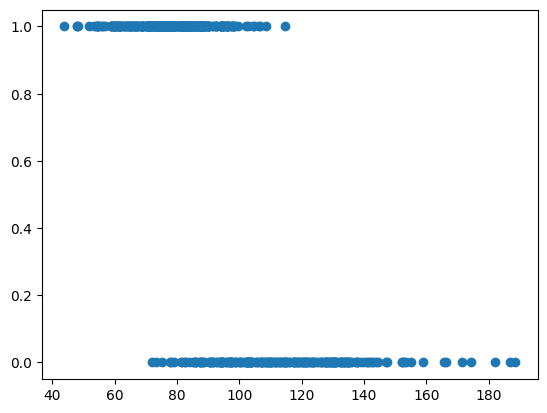

In [196]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [197]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticReg: 

    def __init__(self, lr = 0.01, epoch = 100):
        self.lr = lr
        self.epoch = epoch
        self.weights = None
        self.bias = None

    def sigmoid(self,z):
        return 1/ (1+np.exp(-z))

    def fit(self, X, y, debug=False):
        # M is the size of samples
        # N is the size of features

        m, n = X.shape
        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        y = y.values.reshape(m,1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epoch):
            # Calculate prediction
            z = np.dot(X,self.weights) + self.bias
            #Sigmoide, adapta la linea que tiene rangos infinitos en y a tenerlos solo entre 0 y 1
            y_hat = self.sigmoid(z)
            # Save current loss (Log Loss o Cross-Entropy)
            loss = -np.mean(y * np.log(y_hat+ 1e-8) + (1 - y) * np.log(1 - y_hat+ 1e-8))
            losses.append(loss)
            # Calculate gradient
            dw = (1/m) * np.dot(X.T, (y_hat - y))
            db = (1/m) * np.sum(y_hat - y)
            # Update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            # Save params
            w_list.append(self.weights)
            b_list.append(self.bias)
            if debug:
                print(f"epoch: {epoch}, loss: {loss}")

        if debug:
            plt.plot(range(self.epoch), losses)
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.title("Logistic Regression (Explicit Gradients)")
            plt.show()

    def predict(self, X, threshold=0.5,debug = False):
        z = np.dot(X, self.weights) + self.bias
        y_hat = self.sigmoid(z)
        y_pred = (y_hat >= threshold).astype(int)
        return y_pred

epoch: 0, loss: 6.841451063513421
epoch: 1, loss: 6.7061356150283284
epoch: 2, loss: 6.8419629399846835
epoch: 3, loss: 3.5432396093045315
epoch: 4, loss: 6.841967084735106
epoch: 5, loss: 0.8135526515853114
epoch: 6, loss: 6.836108883973449
epoch: 7, loss: 8.354552613018056
epoch: 8, loss: 6.841913908426961
epoch: 9, loss: 5.213037834609046
epoch: 10, loss: 6.841966683299375
epoch: 11, loss: 2.0873342664582757
epoch: 12, loss: 6.841967106935667
epoch: 13, loss: 0.6334171556666988
epoch: 14, loss: 3.3126310551652502
epoch: 15, loss: 11.547530917510892
epoch: 16, loss: 5.872858016515155
epoch: 17, loss: 11.32337816223715
epoch: 18, loss: 6.761711528107642
epoch: 19, loss: 10.20597008614945
epoch: 20, loss: 6.8403781711330245
epoch: 21, loss: 7.4559480900616375
epoch: 22, loss: 6.841954013342133
epoch: 23, loss: 4.293681133453705
epoch: 24, loss: 6.841967011055715
epoch: 25, loss: 1.2848637454228262
epoch: 26, loss: 6.841966547064664
epoch: 27, loss: 2.2577907847839502
epoch: 28, loss: 6

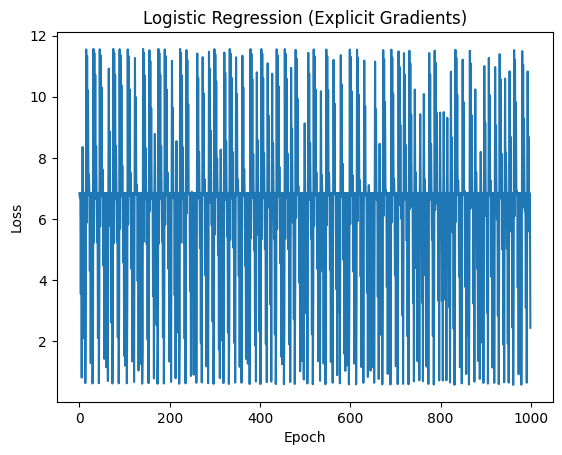

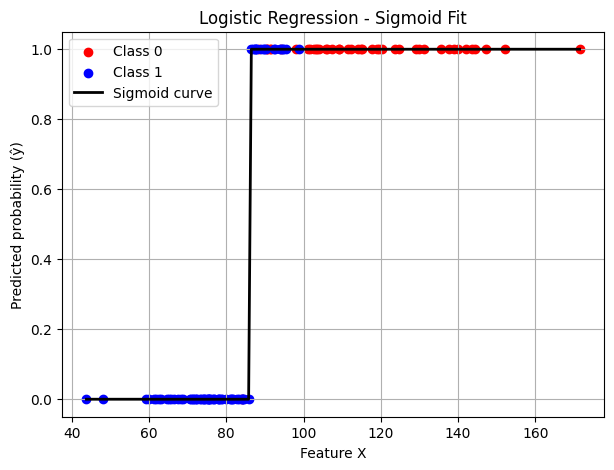

In [199]:
model = LogisticReg(.01,1000)
model.fit(X_train, y_train,True)
y_pred = model.predict(X_test, True)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_test = X_test.ravel()
y_test = y_test.ravel()

X_sorted = np.sort(X_test, axis=0)
y_prob = model.sigmoid(model.weights[0][0] * X_sorted + model.bias[0])

sort_idx = np.argsort(X_test)
X_sorted = X_test[sort_idx]
y_pred_sorted = y_pred[sort_idx]

plt.figure(figsize=(7,5))

# --- Plot actual data points with their predicted probabilities ---
plt.scatter(X_test[y_test==0], y_pred[y_test==0], color='red', label='Class 0')
plt.scatter(X_test[y_test==1], y_pred[y_test==1], color='blue', label='Class 1')

# --- Plot the learned sigmoid curve ---
plt.plot(X_sorted, y_pred_sorted, color='black', linewidth=2, label='Sigmoid curve')

plt.xlabel("Feature X")
plt.ylabel("Predicted probability (ŷ)")
plt.title("Logistic Regression - Sigmoid Fit")
plt.legend()
plt.grid(True)
plt.show()